In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

**重要參數**

eps: 半徑

min_samples: 最少點數

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2      0.0
1            4.9           3.0            1.4           0.2      0.0
2            4.7           3.2            1.3           0.2      0.0
3            4.6           3.1            1.5           0.2      0.0
4            5.0           3.6            1.4           0.2      0.0


In [4]:
# #X表示我們只取幾個特徵空間中的幾個維度
X, Y = iris.data[:,2:4], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape) 

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


In [5]:
#該資料數據類型#
print(df.dtypes)

#用於統計字符串裡某個字符出現的次數#
print(df.count())

#該資料是否有缺失值#
print(df.count()==len(df))

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
dtype: bool


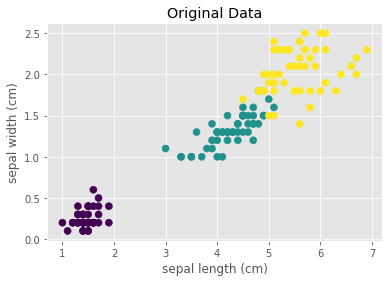

In [3]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Original Data");

**原始數據跟分群演算法預測**

In [4]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Clustering Algorithm Prediction");

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples = 5)

Y_preds = db.fit_predict(X)

Y_true = iris.target

print(Y_preds, Y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


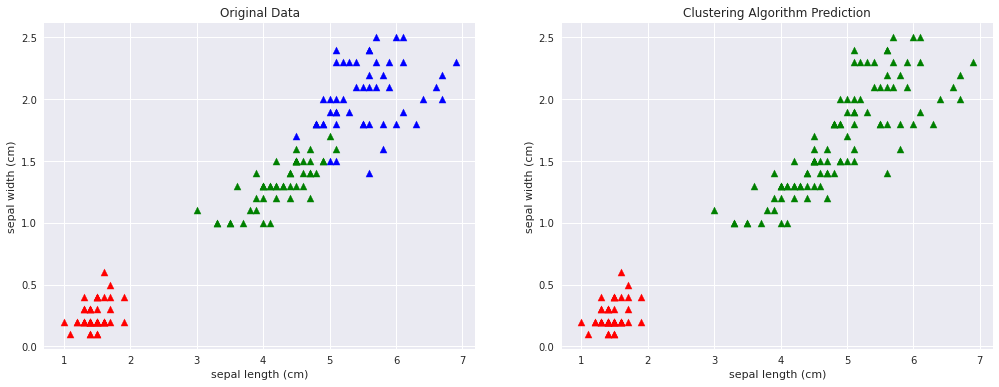

In [6]:
plot_actual_prediction_iris(X, Y, Y_preds)

**Purity指標衡量**

In [7]:
import numpy as np
from sklearn import metrics

def purity_score(Y_true, Y_preds):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(Y_true, Y_preds)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity_score(Y_true, Y_preds)

0.6666666666666666

**純度績效為0.6666666666666666，證明分群效果品質中等。**